In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
import xarray as xr
import tqdm
import utils as utils
import cartopy.crs as ccrs
from scipy.stats import ttest_ind

base_dir = os.path.join(os.getcwd(), '..')
sys.path.append(base_dir)

import fit_spatial_FaIRGP as fairgp
import src.evaluation.visualisation as vis

<IPython.core.display.Javascript object>

In [3]:
train_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']},}
train_data = fairgp.make_data(train_cfg)

model = fairgp.make_model(train_cfg, train_data)
state_dict = torch.load('../data/models/all-ssps/spatial-FaIRGP/state_dict.pt')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [4]:
test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['historical']}}
test_scenarios = fairgp.make_data(test_cfg).scenarios
test_scenarios[0].name = test_scenarios[0].name + '-test'

In [5]:
with torch.no_grad():
    posterior_F = model.forcing_posterior(test_scenarios, diag=False)
posterior_F = posterior_F.reshape(-1, 96, 144)

In [6]:
def encapsulate_as_xarray(data, scenario):
    field = xr.DataArray(data=data.cpu(),
                         dims=['time', 'lat', 'lon'],
                         coords=dict(time=scenario.timesteps.cpu(),
                                     lat=scenario.lat.cpu(),
                                     lon=scenario.lon.cpu()))
    return field

encapsulate = lambda data: encapsulate_as_xarray(data, test_scenarios[0])
xr_posterior_F = encapsulate(posterior_F)

In [7]:
xr_forcing = xr.open_dataarray('../data/forcing.nc')
weights = np.cos(np.deg2rad(xr_forcing.lat))
xr_forcing_glob = xr_forcing.weighted(weights).mean(['lat', 'lon'])
groundtruth_historical_forcing = torch.from_numpy(xr_forcing_glob.values).float()

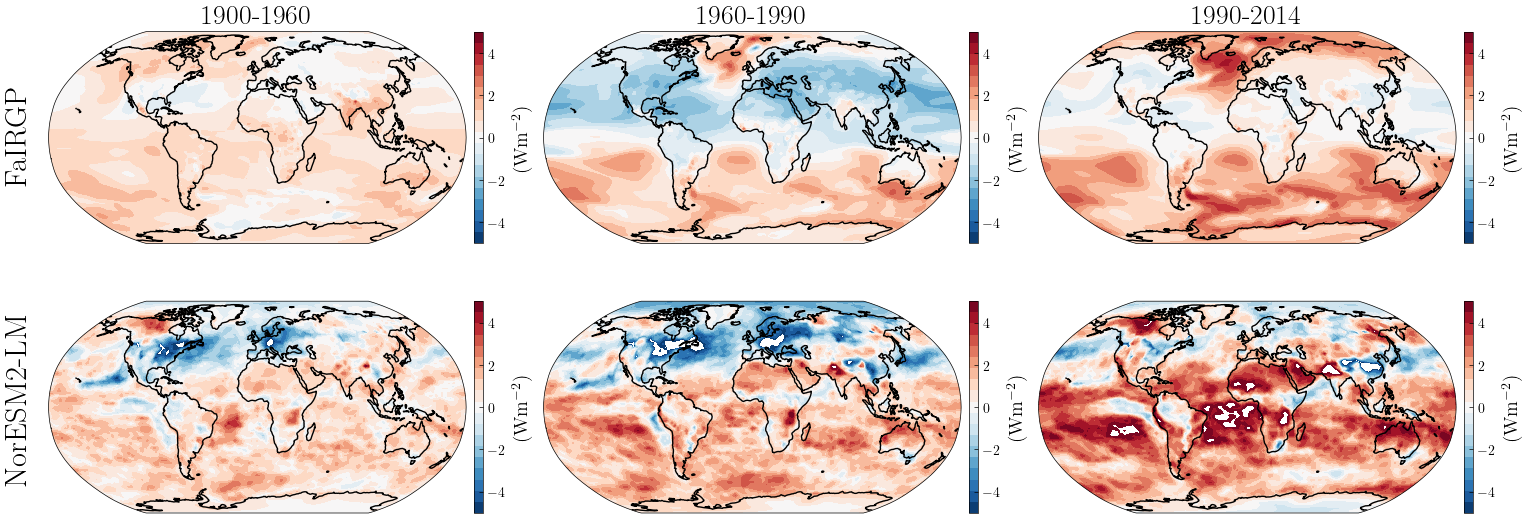

In [21]:
###### years = [(1900, 1960), (1960, 1990), (1990, 2014)]

ncol = len(years)
vmax = posterior_F.max() + 0.1

fig, ax = plt.subplots(2, ncol, figsize=(ncol * 5, 2 * 3), subplot_kw={'projection': ccrs.Robinson()})

for i in range(ncol):
    start, end = years[i]
    time_slice = slice(start, end)
    
    _, __, cbar = vis.plot_contourf_on_ax(xr_posterior_F.sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[0, i], colorbar=True, vmax=vmax)
    cbar.set_label(r'(Wm$^{-2}$)', fontsize=14)
    cbar.set_ticks([-4, -2, 0, 2, 4])
    
    _, __, cbar = vis.plot_contourf_on_ax(xr_forcing.sel(year=time_slice).mean(dim='year'), 
                                          fig, ax[1, i], colorbar=True, vmax=vmax)
    cbar.set_label(r'(Wm$^{-2}$)', fontsize=14)
    cbar.set_ticks([-4, -2, 0, 2, 4])
    ax[0, i].set_title(f'{start}-{end}', fontsize=20)

fig.text(-0.01, 0.72, 'FaIRGP', ha='center', va='center', rotation='vertical', fontsize=22)
fig.text(-0.01, 0.28, 'NorESM2-LM', ha='center', va='center', rotation='vertical', fontsize=22)

# plt.savefig('./figures/comparison-spatial-forcing-posterior-paper-figure.png', dpi=200)

plt.tight_layout()
plt.show()

## SSP245

In [41]:
test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['ssp245']}}
test_scenarios = fairgp.make_data(test_cfg).scenarios
test_scenarios[0].name = test_scenarios[0].name + '-test'

In [42]:
with torch.no_grad():
    posterior_F = model.forcing_posterior(test_scenarios, diag=False)
posterior_F = posterior_F.reshape(-1, 96, 144)

In [43]:
def encapsulate_as_xarray(data, scenario):
    field = xr.DataArray(data=data.cpu(),
                         dims=['time', 'lat', 'lon'],
                         coords=dict(time=scenario.timesteps.cpu(),
                                     lat=scenario.lat.cpu(),
                                     lon=scenario.lon.cpu()))
    return field

encapsulate = lambda data: encapsulate_as_xarray(data, test_scenarios[0])
xr_posterior_F = encapsulate(posterior_F)

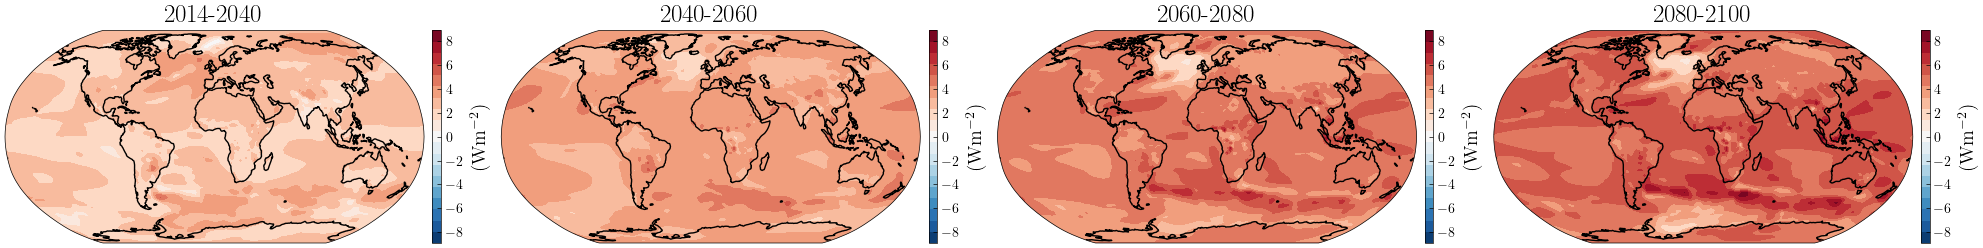

In [45]:
years = [(2014, 2040), (2040, 2060), (2060, 2080), (2080, 2100)]

ncol = len(years)
vmax = posterior_F.max()

fig, ax = plt.subplots(1, ncol, figsize=(ncol * 5, 6), subplot_kw={'projection': ccrs.Robinson()})

for i in range(ncol):
    start, end = years[i]
    time_slice = slice(start, end)
    
    _, __, cbar = vis.plot_contourf_on_ax(xr_posterior_F.sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i], colorbar=True, vmax=vmax)
    cbar.set_label(r'(Wm$^{-2}$)', fontsize=14)
    cbar.set_ticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
    ax[i].set_title(f'{start}-{end}', fontsize=18)
    
plt.tight_layout()
plt.show()

## SSP126

In [51]:
test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['ssp126']}}
test_scenarios = fairgp.make_data(test_cfg).scenarios
test_scenarios[0].name = test_scenarios[0].name + '-test'

In [52]:
with torch.no_grad():
    posterior_F = model.forcing_posterior(test_scenarios, diag=False)
posterior_F = posterior_F.reshape(-1, 96, 144)

In [53]:
def encapsulate_as_xarray(data, scenario):
    field = xr.DataArray(data=data.cpu(),
                         dims=['time', 'lat', 'lon'],
                         coords=dict(time=scenario.timesteps.cpu(),
                                     lat=scenario.lat.cpu(),
                                     lon=scenario.lon.cpu()))
    return field

encapsulate = lambda data: encapsulate_as_xarray(data, test_scenarios[0])
xr_posterior_F = encapsulate(posterior_F)

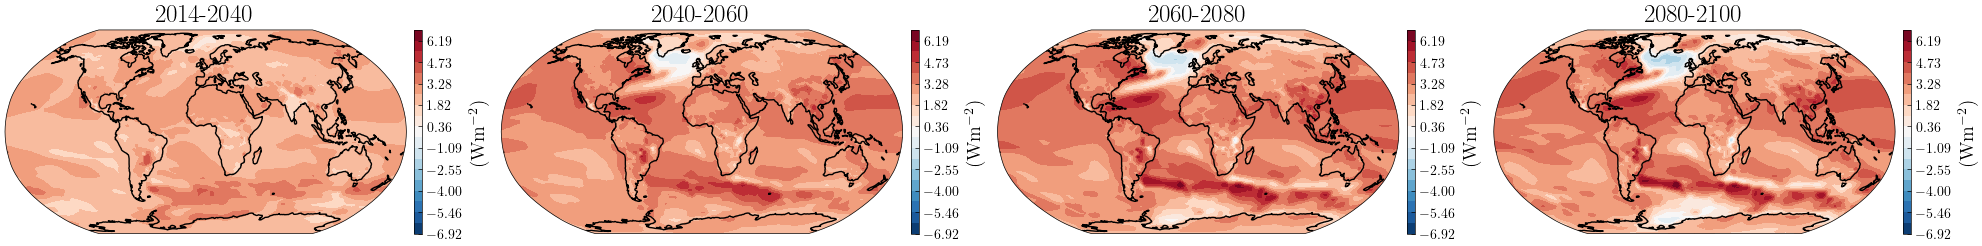

In [54]:
years = [(2014, 2040), (2040, 2060), (2060, 2080), (2080, 2100)]

ncol = len(years)
vmax = posterior_F.max()

fig, ax = plt.subplots(1, ncol, figsize=(ncol * 5, 6), subplot_kw={'projection': ccrs.Robinson()})

for i in range(ncol):
    start, end = years[i]
    time_slice = slice(start, end)
    
    _, __, cbar = vis.plot_contourf_on_ax(xr_posterior_F.sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i], colorbar=True, vmax=vmax)
    cbar.set_label(r'(Wm$^{-2}$)', fontsize=14)
#     cbar.set_ticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
    ax[i].set_title(f'{start}-{end}', fontsize=18)
    
plt.tight_layout()
plt.show()

## SSP585

In [46]:
test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['ssp585']}}
test_scenarios = fairgp.make_data(test_cfg).scenarios
test_scenarios[0].name = test_scenarios[0].name + '-test'

In [47]:
with torch.no_grad():
    posterior_F = model.forcing_posterior(test_scenarios, diag=False)
posterior_F = posterior_F.reshape(-1, 96, 144)

In [48]:
def encapsulate_as_xarray(data, scenario):
    field = xr.DataArray(data=data.cpu(),
                         dims=['time', 'lat', 'lon'],
                         coords=dict(time=scenario.timesteps.cpu(),
                                     lat=scenario.lat.cpu(),
                                     lon=scenario.lon.cpu()))
    return field

encapsulate = lambda data: encapsulate_as_xarray(data, test_scenarios[0])
xr_posterior_F = encapsulate(posterior_F)

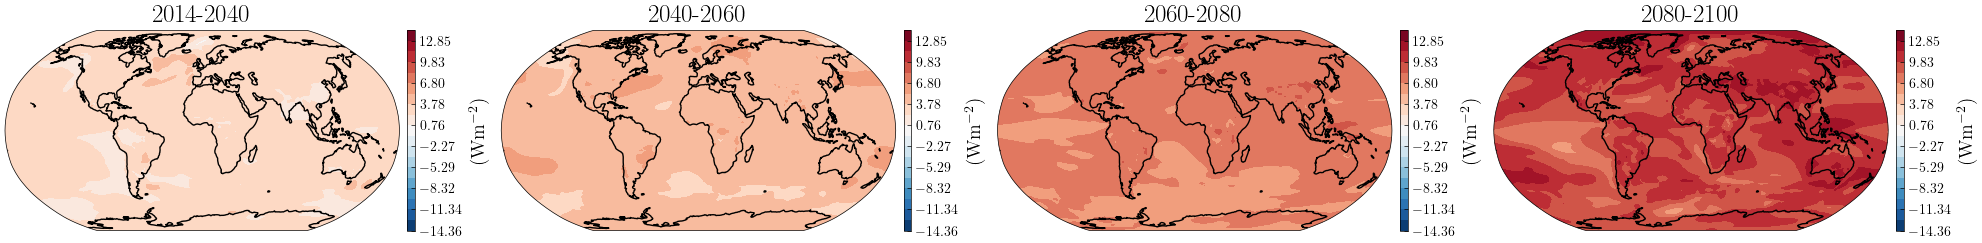

In [50]:
years = [(2014, 2040), (2040, 2060), (2060, 2080), (2080, 2100)]

ncol = len(years)
vmax = posterior_F.max()

fig, ax = plt.subplots(1, ncol, figsize=(ncol * 5, 6), subplot_kw={'projection': ccrs.Robinson()})

for i in range(ncol):
    start, end = years[i]
    time_slice = slice(start, end)
    
    _, __, cbar = vis.plot_contourf_on_ax(xr_posterior_F.sel(time=time_slice).mean(dim='time'), 
                                          fig, ax[i], colorbar=True, vmax=vmax)
    cbar.set_label(r'(Wm$^{-2}$)', fontsize=14)
#     cbar.set_ticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
    ax[i].set_title(f'{start}-{end}', fontsize=18)
    
plt.tight_layout()
plt.show()